In [1]:
import os
from os import listdir
from fastai.vision.all import *
from fastai import *
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import torch


import torchvision.transforms as transforms

In [4]:
base_path='E:/PlantVillage'

In [3]:
listdir(base_path)

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [4]:
from glob import glob

In [5]:
images = glob('E:/PlantVillage/*/*')

In [6]:
len(images)

20639

In [7]:
img_list , label_list = [],[]

plant_diseases = listdir(base_path)

for disease in plant_diseases:
    print(f'processing {disease} images')
    disease_images_list = listdir(f'{base_path}/{disease}')
    for image in disease_images_list:
        image_name= f'{base_path}/{disease}/{image}'
        if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
            img_list.append(image_name)
            label_list.append(disease)

len(img_list)


processing Pepper__bell___Bacterial_spot images
processing Pepper__bell___healthy images
processing Potato___Early_blight images
processing Potato___healthy images
processing Potato___Late_blight images
processing Tomato_Bacterial_spot images
processing Tomato_Early_blight images
processing Tomato_healthy images
processing Tomato_Late_blight images
processing Tomato_Leaf_Mold images
processing Tomato_Septoria_leaf_spot images
processing Tomato_Spider_mites_Two_spotted_spider_mite images
processing Tomato__Target_Spot images
processing Tomato__Tomato_mosaic_virus images
processing Tomato__Tomato_YellowLeaf__Curl_Virus images


20636

In [8]:
len(label_list)

20636

In [50]:
img_list[0:10]

['E:/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/01940b6d-7dea-4889-a7b8-a35f4e9bba34___NREC_B.Spot 9120.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG',
 'E:/PlantVillage/Pepper__bell___Bacterial_spot/01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG',
 'E:/PlantVillage/Pepp

In [9]:
label_list[0:10]

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___Bacterial_spot']

In [89]:
# funstion to get labels for images

def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)

In [90]:
get_labels(img_list[0])

'Pepper__bell___Bacterial_spot'

In [91]:
get_labels(img_list[1000])

'Pepper__bell___healthy'

In [92]:
## loading image as ndarray
def Load_Image(Path):
    img = cv.imread(Path)[:,:,::-1] # opencv read the images in BGR format 
                                    # so we use [:,:,::-1] to convert from BGR to RGB
    return img

In [100]:
img1 = Load_Image(img_list[0])
img2 = Load_Image(img_list[1])
img1

array([[[109,  94,  97],
        [103,  88,  91],
        [134, 119, 122],
        ...,
        [164, 148, 149],
        [169, 153, 154],
        [179, 163, 164]],

       [[138, 123, 126],
        [113,  98, 101],
        [130, 115, 118],
        ...,
        [164, 148, 149],
        [163, 147, 148],
        [166, 150, 151]],

       [[147, 132, 135],
        [ 99,  84,  87],
        [154, 139, 142],
        ...,
        [168, 152, 153],
        [162, 146, 147],
        [160, 144, 145]],

       ...,

       [[155, 142, 149],
        [171, 158, 165],
        [217, 204, 211],
        ...,
        [156, 143, 152],
        [156, 143, 152],
        [155, 142, 151]],

       [[162, 149, 156],
        [141, 128, 135],
        [149, 136, 143],
        ...,
        [170, 157, 166],
        [172, 159, 168],
        [170, 157, 166]],

       [[178, 165, 172],
        [167, 154, 161],
        [196, 183, 190],
        ...,
        [166, 153, 162],
        [171, 158, 167],
        [170, 157, 166]]

In [101]:
#to show image with title
def Show_Image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

In [113]:
## for resizing
Resize_Transformation = transforms.Compose([
   transforms.ToPILImage(), 
  transforms.Resize(size=(256,256)),
])

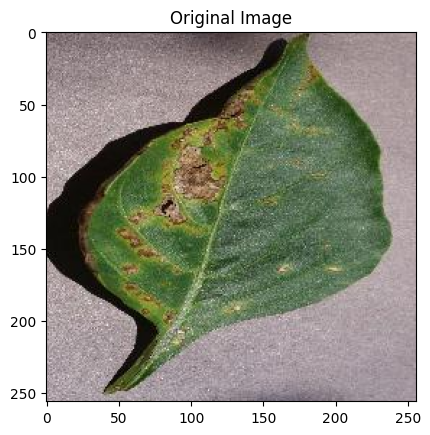

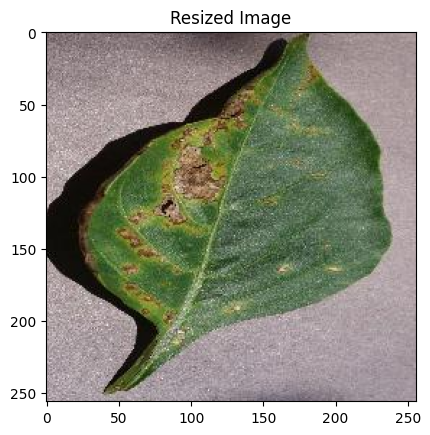

In [114]:
Resized_Img = Resize_Transformation(img1)
Show_Image(img1, 'Original Image')
Show_Image(Resized_Img, 'Resized Image')

In [121]:

Color_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=(0.5,1.2), contrast=1,saturation=0, hue=0.4)
])


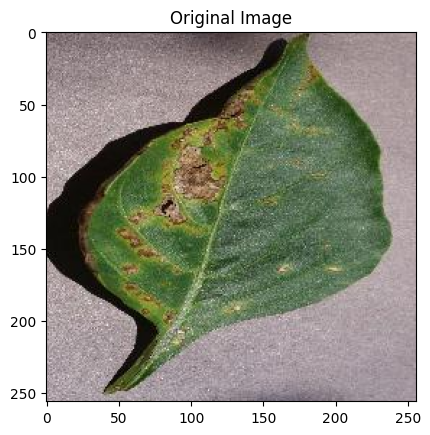

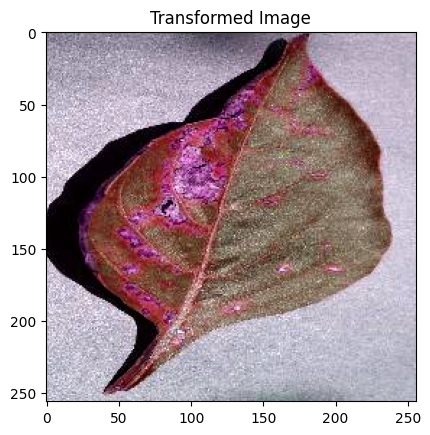

In [122]:
Transformed_Img = Color_Transformation(img1)
Show_Image(img1, 'Original Image')
Show_Image(Transformed_Img, 'Transformed Image')